# Sales Prediction
               - Krrish Mahajan

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"E:\Python basics\Pranjal Sir\8. Oasis Infobyte\5. SALES PREDICTION\Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df=df.drop(columns=['Unnamed: 0'])

In [7]:
df.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df[df.select_dtypes(include='float64').columns] = df[df.select_dtypes(include='float64').columns].apply(np.int64)

In [10]:
df.head(4)

,TV,Radio,Newspaper,Sales
0,230,37,69,22
1,44,39,45,10
2,17,45,69,9
3,151,41,58,18


In [11]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

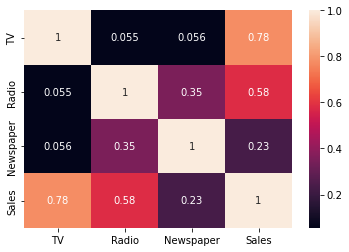

In [12]:
sns.heatmap(df.corr(),annot=True);

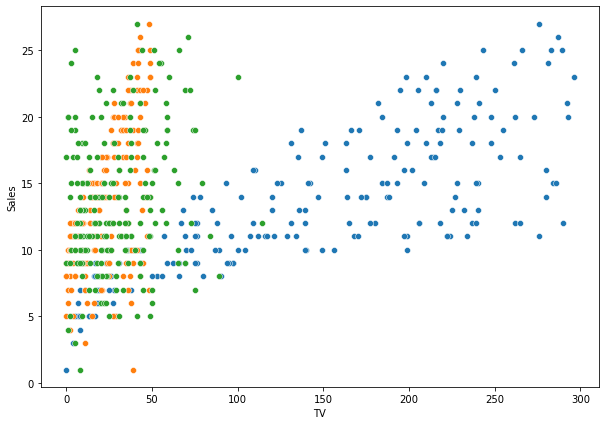

In [13]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df,x=df['TV'],y=df['Sales'])
sns.scatterplot(data=df,x=df['Radio'],y=df['Sales'])
sns.scatterplot(data=df,x=df['Newspaper'],y=df['Sales'])

plt.show()

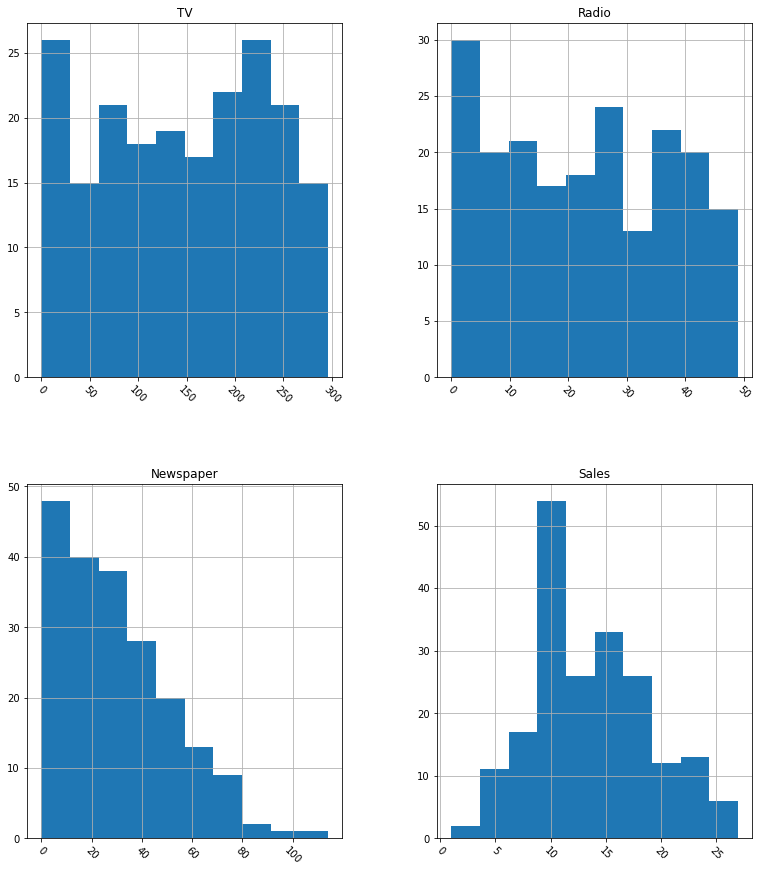

In [14]:
# Plot histogram grid
df.hist(figsize=(13,15), xrot=-45)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df , test_size=.2)
train_x = train.drop('Sales', axis=1)
train_y = train['Sales']
test_x = test.drop('Sales', axis=1)
test_y = test['Sales']

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.fit_transform(test_x)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

model_names =[] 
r2_test =[]
mse_test =[]
rmse_test =[]
mape_test =[]

lin = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
rr = Ridge()
las = Lasso()
knn = KNeighborsRegressor()

models = [lin,dt,rf,rr,las,knn]

for model in models:
    model.fit(train_x, train_y)
    pred = model.predict(test_x)
    
    r2_test.append(round(r2_score(test_y, pred),2))
    mse_test.append(round(mean_squared_error(test_y, pred),2))
    rmse_test.append(round(np.sqrt(mean_squared_error(test_y, pred)),2))
    mape_test.append(round(mean_absolute_percentage_error(test_y, pred),2))


In [18]:
model_names = ['LinReg','DT','RF','Ridge','Lasso','KNN']
result = pd.DataFrame({'R2_Test':r2_test,'MSE':mse_test,'RMSE':rmse_test,'MAPE':mape_test}, index=model_names)
result

,R2_Test,MSE,RMSE,MAPE
LinReg,0.88,2.72,1.65,0.13
DT,0.92,1.80,1.34,0.09
RF,0.96,0.92,0.96,0.07
Ridge,0.88,2.72,1.65,0.13
Lasso,0.83,3.90,1.98,0.13
KNN,0.94,1.50,1.22,0.09


Hence, We got the highest accuracy of 96% in Random Forest and minimum scores of MSE, RMSE, MAPE.